In [13]:
#importing libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#loading dataset
df = pd.read_excel('Mobiles.xlsx')  
#Viewing dataset
df.head(10)  

,Unnamed: 0,Cleaned Detailed Review,Trust
0,1408,nice phone worth money price point else ask th...,1
1,1928,smartphone impressed camera battery backup goo...,1
2,1409,usual value money device one thing attracts st...,1
3,4,best mobile price range battery backup highlig...,1
4,1410,quality wise good good performance prize cam q...,1
5,1,first would like thank flippant fastest delive...,1
6,2,smartphone good camera battery value money sas...,1
7,515,nice product fully satisfied thankyou flippant...,1
8,1415,using phone three day speed good display cool ...,1
9,1463,super 48 camera like,1


In [15]:
#to  display number of rows and column in our dataset
df.shape  

(1485, 3)

In [16]:
#removing null comments  from review column
df = df[df['Cleaned Detailed Review'].notna()]    
df.shape

(1482, 3)

In [17]:
# balancing data in such a way that we are having equal zeros and ones
high_review = df[df['Trust']==1]
low_review = df[df['Trust']==0]
df_high_new = high_review.sample(low_review.shape[0])
df= pd.concat([df_high_new, low_review])

In [18]:
df['Trust'].value_counts()

1    461
0    461
Name: Trust, dtype: int64

In [19]:
#Converting Cleaned detailed review column to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Cleaned Detailed Review'])  

In [20]:
#Displaying matrix form of column 
print(text_tf)  

  (0, 1949)	0.18794642476234127
  (0, 339)	0.20134292473090376
  (0, 2168)	0.1931595101685539
  (0, 336)	0.1426045228868528
  (0, 1613)	0.21159160676883743
  (0, 2171)	0.20614615425561542
  (0, 1985)	0.29094643939215475
  (0, 1984)	0.1565411674002783
  (0, 373)	0.274411443773709
  (0, 549)	0.23985836848101721
  (0, 136)	0.23985836848101721
  (0, 1960)	0.29094643939215475
  (0, 777)	0.14480940130654424
  (0, 1123)	0.3792223172743394
  (0, 1713)	0.21461375336135458
  (0, 1251)	0.22960968644308355
  (0, 841)	0.09167005033787949
  (0, 132)	0.1453797646871317
  (0, 1563)	0.1140703483020709
  (0, 352)	0.08410688068916461
  (0, 1272)	0.13525892073803725
  (0, 1521)	0.2521390545368142
  (1, 91)	0.37696343279719513
  (1, 1668)	0.37696343279719513
  (1, 346)	0.4776635091158258
  :	:
  (919, 1313)	0.3602454315665648
  (919, 1413)	0.19857557461711714
  (920, 1379)	0.7024902939852987
  (920, 1841)	0.6128120205964158
  (920, 1563)	0.36189613740545307
  (921, 935)	0.2923338634115463
  (921, 83)	0.254

In [21]:
#splitting data into train and test data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Trust'], test_size=0.3, random_state=1,stratify=df['Trust'])

In [22]:
#applying MultinomialNB to our data 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
#putting traaining data
clf = MultinomialNB().fit(X_train, y_train)  
y_predicted= clf.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm 

array([[113,  25],
       [ 26, 113]])

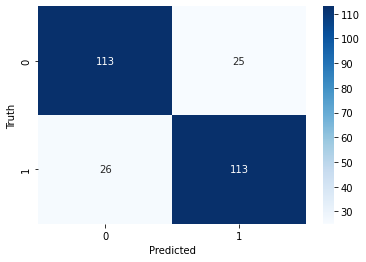

In [24]:
#plotting heatmap
sns.heatmap(cm,annot=True, fmt='1', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [25]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       138
           1       0.82      0.81      0.82       139

    accuracy                           0.82       277
   macro avg       0.82      0.82      0.82       277
weighted avg       0.82      0.82      0.82       277

